Import of the differents libraries needed

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Declaration of the linear model

In [2]:
A = np.array([[0.9512, 0],[0.0476, 0.9512]])
B = np.array([0.0975, 0.0024])
C = np.array([0,1])
G = 1

Import of the data

In [39]:
with open('Data_linear_case/True_state_x1_linear_case.txt', "r") as f:
    f.readline()
    True_state_x1 = np.array(list(float(f.readline().split(" ")[0]) for i in range(1000)))        
with open('Data_linear_case/True_state_x2_linear_case.txt', "r") as f:
    f.readline()
    True_state_x2 = np.array(list(float(f.readline().split(" ")[0]) for i in range(1000)))   
with open('Data_linear_case/Input_linear_case.txt', "r") as f:
    f.readline()
    u = np.array(list(float(f.readline().split(" ")[0]) for i in range(1000)))  
with open('Data_linear_case/Measured_output_linear_case.txt', "r") as f:
    f.readline()
    y = np.array(list(float(f.readline().split(" ")[0]) for i in range(1000)))   

Defining noises w(k) and v(k)

In [5]:
mu_w = np.array([0,0])
Q = 0.001*np.array([[9.506,0.234],[0.234,9.512]])
w = np.random.multivariate_normal(mu_w, Q, 1000)
mu_v = 0
R = 0.0125
v = np.random.normal(mu_v, R, 1000)

Defining the vector xfor with it's initial value x_0 as the forecast step vector of states : x(k|k-1)

In [6]:
mu_x_0 = np.array([5,5])
P_0 = np.array([[1,0],[0,1]])
x_0 = np.random.multivariate_normal(mu_x_0,P_0, 1)[0]
xfor = np.zeros((1000,2))
xfor[0] = x_0

Compute of the forecast step, x(k|k-1)

In [59]:
muk_tilde = np.zeros((1000,2))
muk_tilde[0] = mu_x_0
Pk_tilde = np.zeros((1000,2,2))
Pk_tilde[0] = P_0
for k in range(1,1000):
    #CPCTR = np.dot(C,np.dot(Pk[k-1],C.transpose()))+R #toujours un scalaire
    #P = np.dot(A,np.matmul(Pk[k-1],A.transpose())) + G * Q * G - np.outer(np.dot(A,np.dot(Pk[k-1],C.transpose())),np.dot(C,np.matmul(Pk[k-1],A.transpose())))/CPCTR
    #Pk[k] = P
    #K = np.dot(A,np.dot(Pk[k-1],C.transpose()))/CPCTR
    #xfor[k] = A@xfor[k-1]+B*u[k-1]+ K*(y[k-1]-np.dot(C,xfor[k-1]))
    muk_tilde[k] = np.dot(A,muk_tilde[k-1])+B*u[k]
    Pk_tilde[k] = np.dot(A,np.matmul(Pk_tilde[k-1],A.transpose())) + Q

[[[1.         0.        ]
  [0.         1.        ]]

 [[0.91428744 0.04551112]
  [0.04551112 0.9165592 ]]

 [[0.83673631 0.08280792]
  [0.08280792 0.84499053]]

 ...

 [[0.09983348 0.04992905]
  [0.04992905 0.14975532]]

 [[0.09983348 0.04992905]
  [0.04992905 0.14975532]]

 [[0.09983348 0.04992905]
  [0.04992905 0.14975532]]]


Defining the vector xup with it's initial value x_0 as the update step vector of states : x(k|k) using y(k) and x(k|k-1)

In [8]:
mu_x_0 = np.array([5,5])
P_0 = np.array([[1,0],[0,1]])
x_0 = np.random.multivariate_normal(mu_x_0,P_0, 1)[0]
xup = np.zeros((1000,2))
xup[0] = x_0

Compute of the update step x(k|k)

In [81]:
muk = np.zeros((1000,2))
muk[0] = mu_x_0
Pk = np.zeros((1000,2,2))
Pk[0] = P_0
for k in range(1,1000):
    CPCTR = np.dot(C,np.dot(Pk_tilde[k],C.transpose()))+R #toujours un scalaire
    Kf = np.dot(Pk_tilde[k],C.transpose())/CPCTR
    #P = Pk[k]- np.outer(np.dot(Pk[k],C.transpose()),np.dot(C,Pk[k]))/CPCTR
    #Pkk[k] = P
    #xup[k] = xfor[k] + Kf*(y[k]- np.dot(C,xfor[k]))
    print( np.outer(Kf,C))
    muk[k] = muk_tilde[k] + Kf*(y[k]- np.dot(C,muk_tilde[k]))
    Pk[k] = np.dot(np.identity(2) - np.matmul(Kf,C.transpose()) , Pk_tilde[k])

[[0.         0.04898624]
 [0.         0.98654553]]
[[0.         0.09657007]
 [0.         0.98542258]]
[[0.         0.14202369]
 [0.         0.98429526]]
[[0.         0.18472765]
 [0.         0.98317236]]
[[0.         0.22419421]
 [0.         0.98206126]]
[[0.         0.26007839]
 [0.         0.98096769]]
[[0.         0.29217723]
 [0.         0.97989564]]
[[0.         0.32041926]
 [0.         0.97884741]]
[[0.         0.34484713]
 [0.         0.97782375]]
[[0.         0.36559626]
 [0.         0.97682411]]
[[0.         0.38287235]
 [0.         0.97584688]]
[[0.         0.39692982]
 [0.         0.97488966]]
[[0.         0.40805259]
 [0.         0.97394954]]
[[0.         0.41653806]
 [0.         0.9730233 ]]
[[0.         0.42268432]
 [0.         0.9721076 ]]
[[0.         0.4267808 ]
 [0.         0.97119915]]
[[0.         0.42910158]
 [0.         0.9702948 ]]
[[0.         0.42990125]
 [0.         0.96939165]]
[[0.         0.42941263]
 [0.         0.96848709]]
[[0.         0.42784588]
 [0.  

[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.  

[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.         0.92296092]]
[[0.         0.30771904]
 [0.  

Compute of the confidence interval

In [75]:
upper_x1 = np.array([(1.96 * Pk[w,0,0]**0.5)+xup[w,0] for w in range(1000)])
lower_x1 = np.array([-1.96 * Pk[w,0,0]**0.5+xup[w,0] for w in range(1000)])
upper_x2 = np.array([1.96 * Pk[w,1,1]**0.5+xup[w,1] for w in range(1000)])
lower_x2 = np.array([-1.96 * Pk[w,1,1]**0.5+xup[w,1] for w in range(1000)]) 

[ 1.         -0.03259754 -0.06940334 -0.09922801 -0.1230801  -0.14183766
 -0.1562638  -0.1670206  -0.17468154 -0.17974258 -0.18263199 -0.18371899
 -0.18332137 -0.18171211 -0.17912527 -0.17576102 -0.17179007 -0.16735758
 -0.1625865  -0.15758051 -0.15242663 -0.14719743 -0.14195301 -0.13674274
 -0.13160671 -0.12657711 -0.12167932 -0.11693293 -0.11235262 -0.10794892
 -0.10372885 -0.09969651 -0.09585355 -0.09219964 -0.08873282 -0.08544978
 -0.08234618 -0.07941688 -0.0766561  -0.07405762 -0.07161489 -0.06932119
 -0.06716969 -0.06515353 -0.06326592 -0.06150017 -0.05984971 -0.05830818
 -0.05686939 -0.05552738 -0.05427644 -0.05311109 -0.05202607 -0.05101641
 -0.05007737 -0.04920442 -0.04839333 -0.04764004 -0.04694076 -0.04629189
 -0.04569005 -0.04513206 -0.04461493 -0.04413585 -0.04369219 -0.04328148
 -0.04290141 -0.0425498  -0.04222465 -0.04192406 -0.04164626 -0.0413896
 -0.04115255 -0.04093368 -0.04073165 -0.04054522 -0.04037323 -0.0402146
 -0.04006834 -0.03993351 -0.03980926 -0.03969478 -0.0

<ipython-input-75-855dbebd352b>:2: RuntimeWarning: invalid value encountered in double_scalars
  upper_x1 = np.array([(1.96 * Pk[w,0,0]**0.5)+xup[w,0] for w in range(1000)])
<ipython-input-75-855dbebd352b>:3: RuntimeWarning: invalid value encountered in double_scalars
  lower_x1 = np.array([-1.96 * Pk[w,0,0]**0.5+xup[w,0] for w in range(1000)])
<ipython-input-75-855dbebd352b>:4: RuntimeWarning: invalid value encountered in double_scalars
  upper_x2 = np.array([1.96 * Pk[w,1,1]**0.5+xup[w,1] for w in range(1000)])
<ipython-input-75-855dbebd352b>:5: RuntimeWarning: invalid value encountered in double_scalars
  lower_x2 = np.array([-1.96 * Pk[w,1,1]**0.5+xup[w,1] for w in range(1000)])


Compute of the RMSD function

In [72]:
def RMSD(x,y):
    n = len(x)
    v = np.power(x-y,2)
    rmsd = np.zeros(n)
    for i in range(n):
        rmsd[i] = np.sqrt(np.sum(v[:i+1,:]) / (i+1))
    return rmsd
        
rmsd = RMSD(np.array([True_state_x1, True_state_x2]).T,xup)

Vartiation of the true state depending on the input

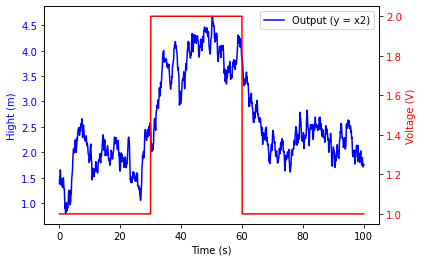

In [73]:
time = np.linspace(0.1,100,1000)
figure1 = plt.figure()
ax1 = figure1.add_subplot(1,1,1) #retourne un objet de type Axes
ax1.plot(time,y, label= "Output (y = x2)" , color='blue')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Hight (m)", color = 'blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(time,u,label='Motor input (u)', color = 'red')
ax2.set_ylabel("Voltage (V)", color = 'red')
ax2.tick_params(axis='y', labelcolor='red')
ax1.legend()
figure1.savefig('Input and output.png')
#figure1.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Plot of the states, True values vs Filtered values with the confidence interval

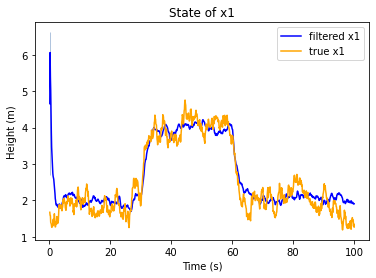

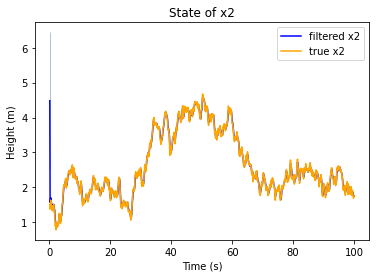

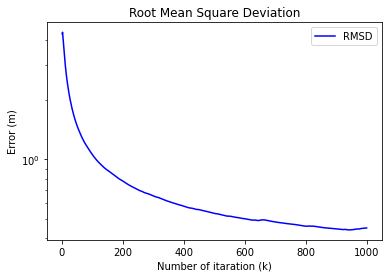

In [74]:
figure1 = plt.figure()
figure2 = plt.figure()
figure3 = plt.figure()
time = np.linspace(0.1,100,1000)
ax1 = figure1.add_subplot(1,1,1) #retourne un objet de type Axes
ax1.plot(time,xup[:,0], label= "filtered x1" , color='blue')
ax1.plot(time,True_state_x1, label= "true x1" , color='orange')
ax1.fill_between(time,upper_x1,lower_x1, color='lightsteelblue')
ax2 = figure2.add_subplot(1,1,1) #retourne un objet de type Axes
ax2.plot(time,xup[:,1], label= "filtered x2", color='blue' )
ax2.plot(time,True_state_x2, label= "true x2" , color='orange')
ax2.fill_between(time,upper_x2,lower_x2, color='lightsteelblue')
ax3 = figure3.add_subplot(1,1,1) #retourne un objet de type Axes
ax3.semilogy(time*10,rmsd, label= "RMSD" , color='blue')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_title("State of x1")
ax2.set_title("State of x2")
ax3.set_title("Root Mean Square Deviation")
ax1.set_xlabel("Time (s)")
ax2.set_xlabel("Time (s)")
ax3.set_xlabel("Number of itaration (k)")
ax1.set_ylabel("Height (m)")
ax2.set_ylabel("Height (m)")
ax3.set_ylabel("Error (m)")
plt.show()
figure1.savefig('Statex1.png')
figure2.savefig('Statex2.png')
figure3.savefig('RMSD.png')